In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [9]:
test = pd.read_csv("test (1).csv")
train = pd.read_csv("train (1).csv")
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Text(0.5, 1.0, 'Correlation ')

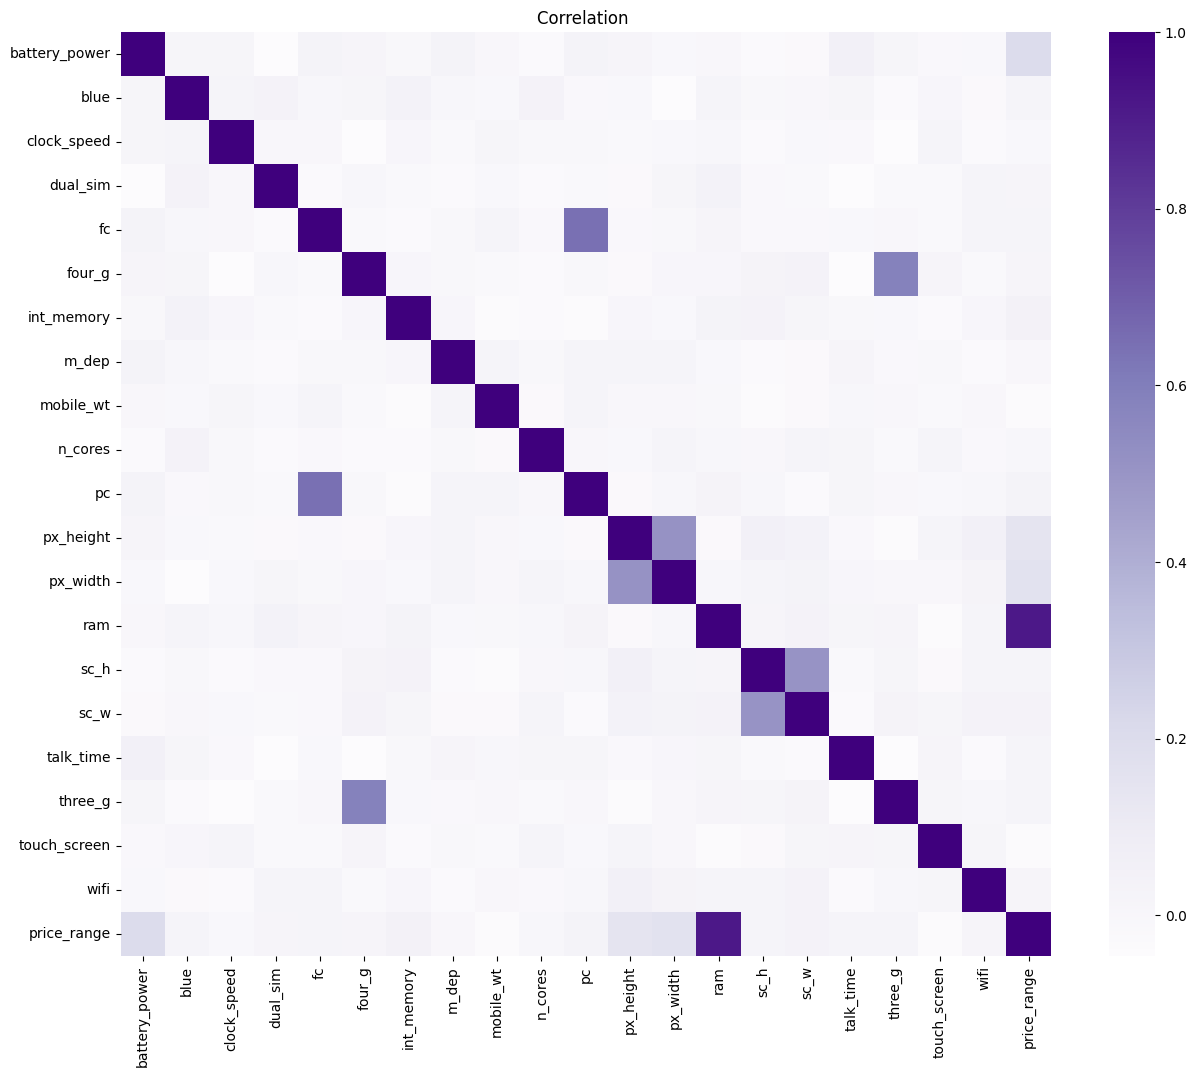

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

In [11]:

corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [12]:
y = data["price_range"].values
x_data=data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)


C:\Users\Compact\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

C:\Users\Compact\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

C:\Users\Compact\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'



In [14]:
pip install yellowbrick

You should consider upgrading via the 'C:\Users\Compact\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


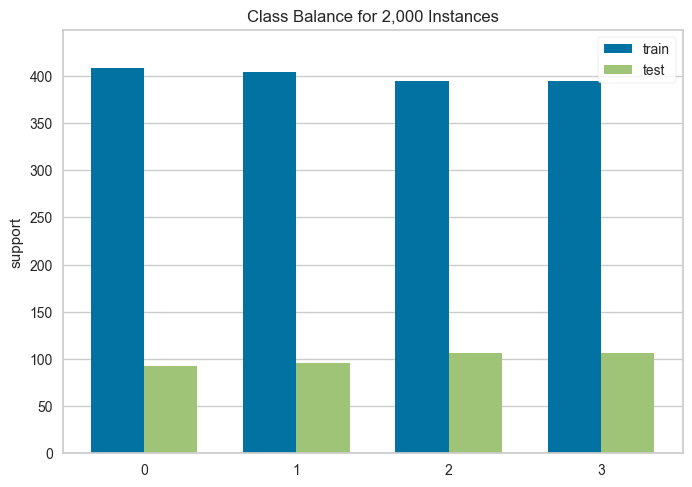

<AxesSubplot: title={'center': 'Class Balance for 2,000 Instances'}, ylabel='support'>

In [15]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

In [16]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.97125
test accuracy: 0.8375


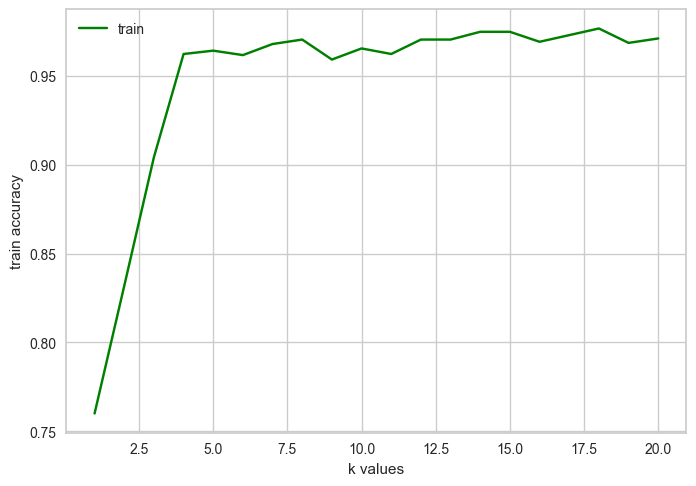

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
accuracy_list_train = []
k=np.arange(1,21,1)
for each in k:
    x_new = SelectKBest(f_classif, k=each).fit_transform(x_train, y_train)
    svm.fit(x_new,y_train)
    accuracy_list_train.append(svm.score(x_new,y_train))   
    
plt.plot(k,accuracy_list_train,color="green",label="train")
plt.xlabel("k values")
plt.ylabel("train accuracy")
plt.legend()
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV

C=[1,0.1,0.25,0.5,2,0.75]
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]
svm=SVC(random_state=1)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_new,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.943125
best param:  {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


In [30]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
svm_test=x_test[["battery_power","int_memory","px_height","px_width","ram"]]
svm_test["y_true"]=y_test
svm_test["y_pred"]=y_test
svm_test.head()

,battery_power,int_memory,px_height,px_width,ram,y_true,y_pred
674,0.356045,0.693548,0.092857,0.529372,0.190540,0,0
1699,0.334669,0.693548,0.483673,0.338451,0.261358,0,0
1282,0.072144,0.129032,0.057653,0.683578,0.440673,1,1
1315,0.674015,0.483871,0.491327,0.680908,0.159808,1,1
1210,0.203073,0.903226,0.041327,0.696929,0.839391,2,2
